# Proyecto práctico

## Configuracion inicial


In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
sns.set(style='whitegrid', context='notebook')

## Importar datos

In [26]:
df = pd.read_csv( 'cp-10k-GH-GetRepos-V3 - Main.csv') 
# Seleccionar columnas específicas
filcol = ['Name', 'Lang', 'Estrellas', 'Forks', 'Subs', 'Issues']
df = df[filcol]
df.head()

,Name,Lang,Estrellas,Forks,Subs,Issues
0,grit,Ruby,1965,536,72,30
1,rubinius,C,3044,604,103,15
2,god,Ruby,2204,521,87,432
3,restful-authentication,Ruby,1573,277,17,27
4,attachment_fu,Ruby,1024,324,10,35


In [27]:
df1 = pd.concat([df.head(), df.tail()])
df1

,Name,Lang,Estrellas,Forks,Subs,Issues
0,grit,Ruby,1965,536,72,30
1,rubinius,C,3044,604,103,15
2,god,Ruby,2204,521,87,432
3,restful-authentication,Ruby,1573,277,17,27
4,attachment_fu,Ruby,1024,324,10,35
10724,zed,JavaScript,2170,171,65,180
10725,LINQKit,C#,1497,159,52,40
10726,gt-nlp-class,TeX,4825,1055,323,2
10727,realm-dotnet,C#,1189,164,75,137
10728,xbanish,C,502,63,16,16


## Analizando los datos

(9187, 6)


<Axes: >

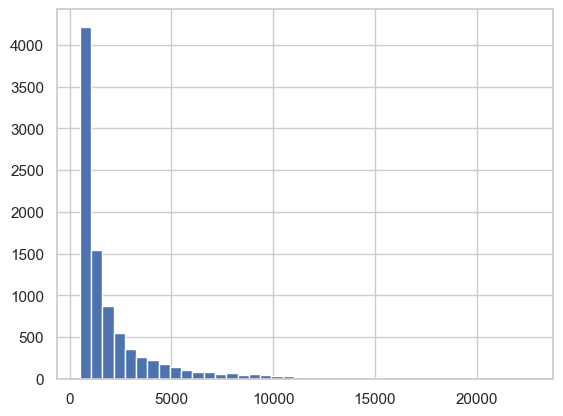

In [30]:
print(dfo.shape)
dfo.Estrellas.hist(bins =40)

## Filtrar

In [6]:
#Lenguajes que al menos se repiten 100 veces
df_fil = df[
    df['Lang'].isin(
        df['Lang'].value_counts()[df['Lang'].value_counts() > 100].index
    ) & 
    (df['Forks'] <= 4000)
]


In [7]:
#z_stars = np.abs(stats.zscore(df.Estrellas))
#z_forks = np.abs(stats.zscore(df.Forks))
#df[(z_stars > 3) | (z_forks > 3)]

In [31]:
z = np.abs(stats.zscore(df.Estrellas))
df_fil[(z > 3)]

C:\Users\guido\AppData\Local\Temp\ipykernel_20356\959589770.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fil[(z > 3)]


,Name,Lang,Estrellas,Forks,Subs,Issues
859,Modernizr,JavaScript,25469,3046,909,192
1194,gitflow,Shell,26217,2688,593,319
1292,mitmproxy,Python,31246,3719,618,284
1469,mongoose,JavaScript,25730,3740,492,272
1687,async,JavaScript,27871,2454,670,24
1714,fabric.js,JavaScript,25019,3276,469,351
2062,sentry,Python,34416,3815,684,1234
2239,nodemon,JavaScript,25279,1715,262,12
2545,aria2,C++,30584,3276,734,1009
2676,netron,JavaScript,23162,2490,290,26


In [9]:
dfo = df_fil[z<3]
dfo

C:\Users\guido\AppData\Local\Temp\ipykernel_20356\2013360648.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfo = df_fil[z<3]


,Name,Lang,Estrellas,Forks,Subs,Issues
0,grit,Ruby,1965,536,72,30
1,rubinius,C,3044,604,103,15
2,god,Ruby,2204,521,87,432
3,restful-authentication,Ruby,1573,277,17,27
4,attachment_fu,Ruby,1024,324,10,35
...,...,...,...,...,...,...
10723,heroku-fucking-console,Ruby,560,17,12,4
10724,zed,JavaScript,2170,171,65,180
10725,LINQKit,C#,1497,159,52,40
10727,realm-dotnet,C#,1189,164,75,137


## Análisis de correlación de los datos

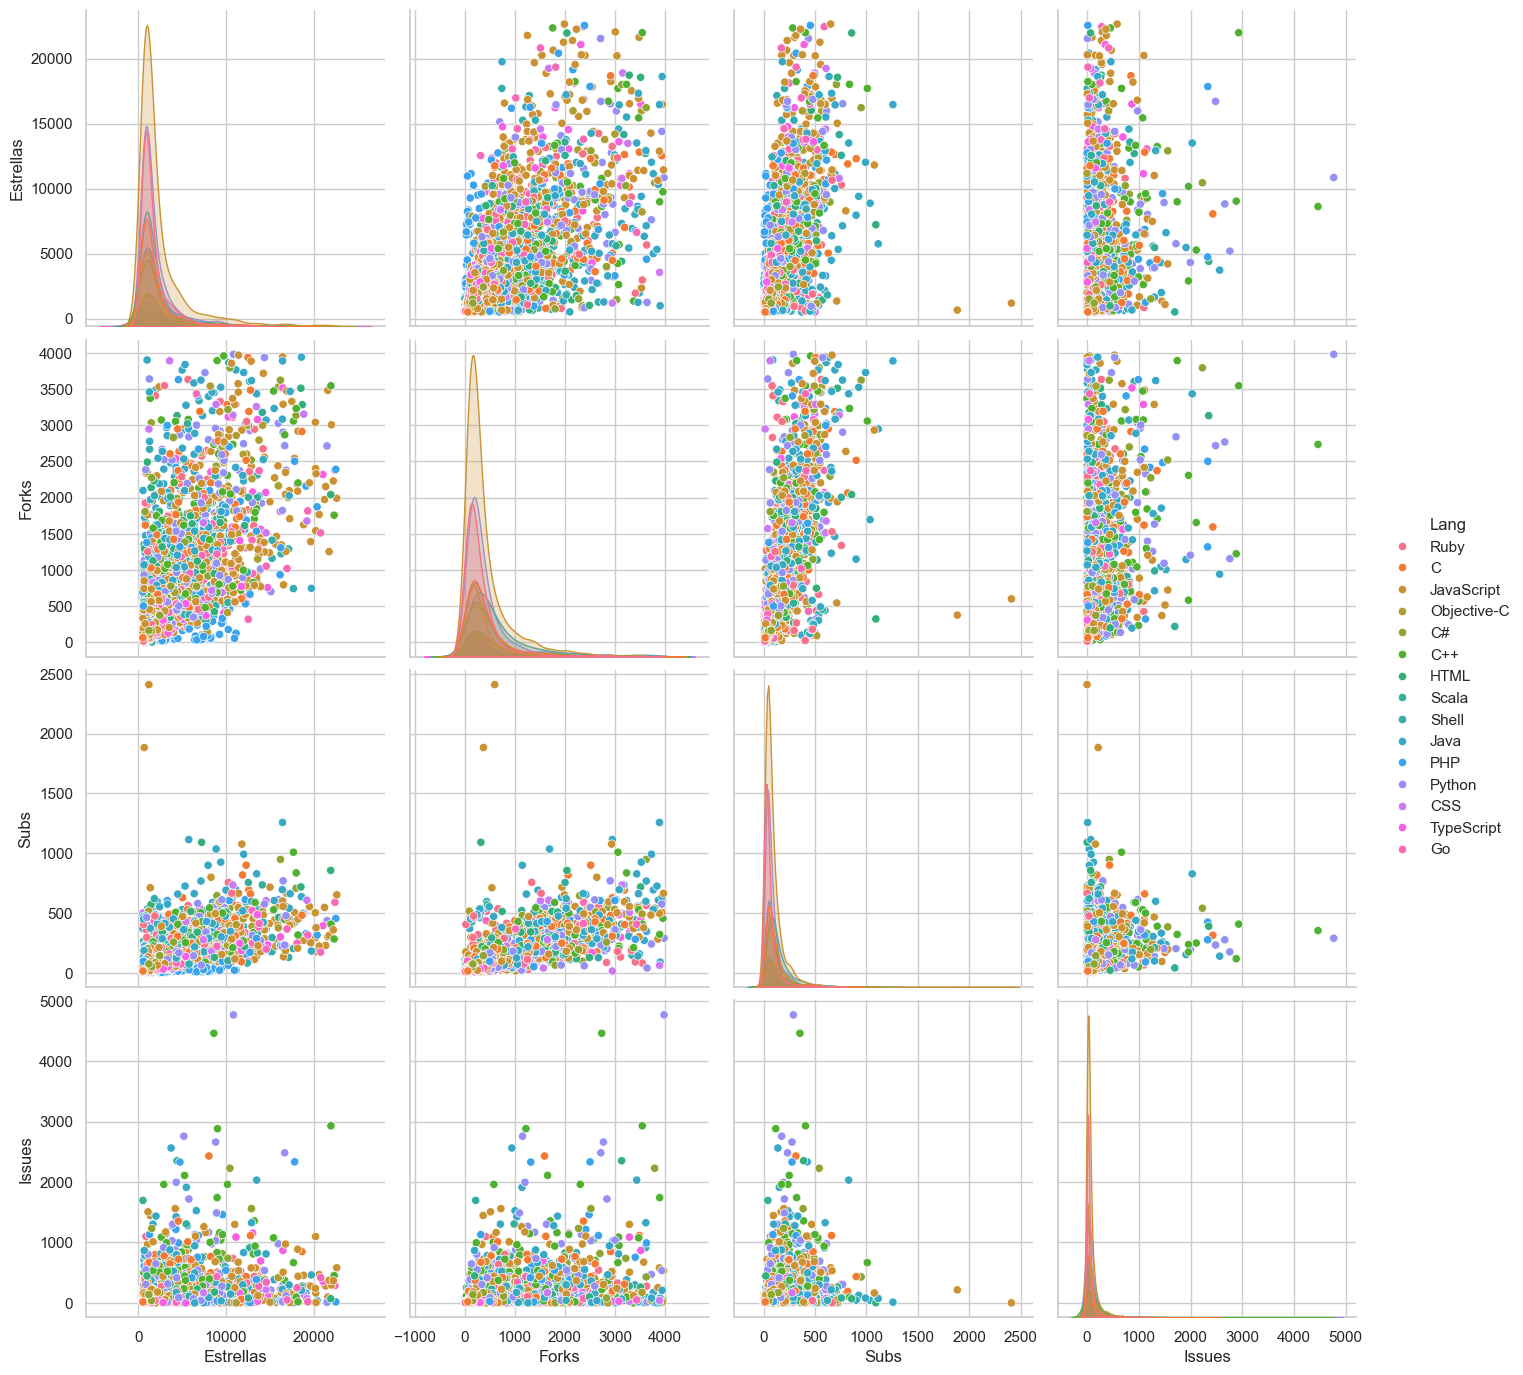

In [33]:
sns.pairplot(dfo, hue='Lang', height=3.5);


(10729, 6)

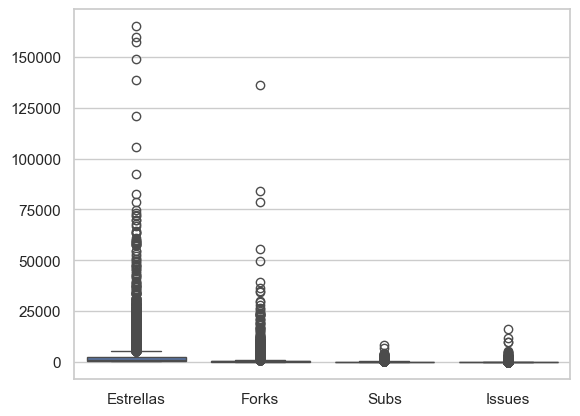

In [11]:
sns.boxplot(df)
df.shape

(9187, 6)

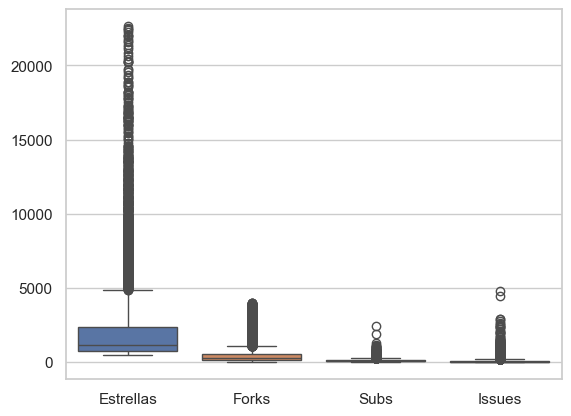

In [12]:
sns.boxplot(dfo)
dfo.shape

## Análisis numérico

In [13]:
df_dummy = pd.get_dummies(dfo, columns=['Lang'], drop_first=True)
df_dummy_corr = df_dummy.corr(numeric_only=True)
df_corr = df.corr(numeric_only=True)

In [41]:
df_corr = df.corr(numeric_only=True)
df_corr

,Estrellas,Forks,Subs,Issues
Estrellas,1.000000,0.702852,0.859036,0.307570
Forks,0.702852,1.000000,0.724553,0.469114
Subs,0.859036,0.724553,1.000000,0.272489
Issues,0.307570,0.469114,0.272489,1.000000


In [14]:
dfo

,Name,Lang,Estrellas,Forks,Subs,Issues
0,grit,Ruby,1965,536,72,30
1,rubinius,C,3044,604,103,15
2,god,Ruby,2204,521,87,432
3,restful-authentication,Ruby,1573,277,17,27
4,attachment_fu,Ruby,1024,324,10,35
...,...,...,...,...,...,...
10723,heroku-fucking-console,Ruby,560,17,12,4
10724,zed,JavaScript,2170,171,65,180
10725,LINQKit,C#,1497,159,52,40
10727,realm-dotnet,C#,1189,164,75,137


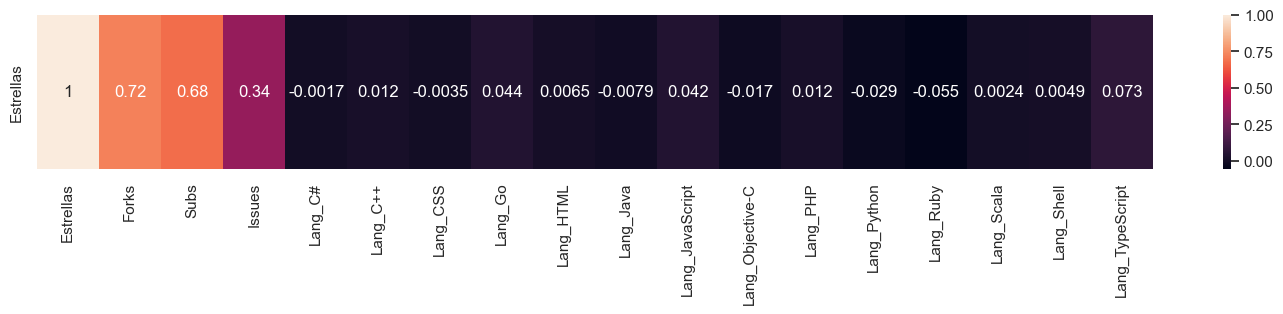

In [15]:
plt.figure(figsize=(18,2))
sns.heatmap(df_dummy_corr.iloc[0:1,:],annot=True);

# Entrenamiento del modelo

## Creando modelos

In [16]:
from sklearn.preprocessing import StandardScaler     # se utilizará para estandarizar los datos numéricos y la librería 
from sklearn.linear_model import LinearRegression    # para crear el modelo de regresión lineal. Además, se importa la librería 
from sklearn.model_selection import train_test_split # para dividir los datos en conjuntos de entrenamiento y prueba.

In [17]:
# Seleccionamos las variables predictoras (todas excepto la variable objetivo)
X_cols = list(df_dummy.select_dtypes(include='number').drop(columns=['Estrellas']).columns)

# Seleccionamos la variable objetivo
y_col = ['Estrellas']

# Separamos los datos en conjuntos de entrenamiento y prueba
X = df_dummy[X_cols].values
y = df_dummy[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Estandarizamos las variables predictoras y objetivo en ambos conjuntos
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Creamos y entrenamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred = model.predict(X_test)

In [18]:
y_pred.shape

(2297, 1)

# Evaluando el modelo

## Funciones de metricas


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred).round(4))
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('R^2:', r2_score(y_test, y_pred).round(4))

MAE: 0.3755
MSE: 0.4782
R^2: 0.5472


## Insight

In [20]:
# from regressors import stats
from scipy import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [21]:
y_test = y_test.reshape(-1)

# print('='*16,'Summary','='*16)
#stats.summary(model, X_test, y_test, X_cols)

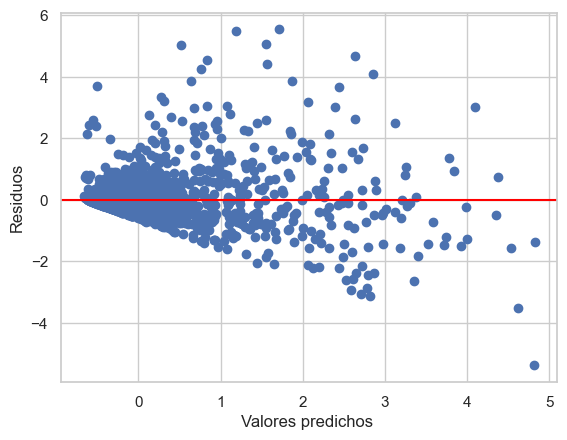

In [22]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(0,0,color='red')
plt.xlabel('Valores predichos ')
plt.ylabel('Residuos')
plt.plot();